# Trabalho em Grupo I

```
Disciplina: Inteligência artificial 6º semestre
IFSP campus Campinas
Alunos: 
- Paulo Henrique Belucci - CP3001369
- Silvio da Col de Brito - CP300130X
Prof.: Dr. Samuel Martins
```

## Análise exploratória - Pandemia do Corona vírus no Brasil

---

### Descrição e motivação

A pandemia do Corona vírus teve início ao final do ano 2019 e, em pouco mais de um ano, é responsável por mais de 1,4 milhão de mortes em todo o mundo. Seus sintomas são parecidos com os sintomas da gripe, com destaque para a síndrome respiratória. Embora sua taxa de letalidade não seja tão alta, seu sintomas somados a um grande número de infectados tem se tornado um gravíssimo problema de saúde pública em todos os países, devido a sobrecarga de leitos de Unidade de Tratamento Intensivo (UTI) por aqueles casos se se agravam.

Muitos estudos e pesquisas tem sido desenvolvidos em prol de mapear a genética do vírus, entender as formas de contágio, testar tratamentos para pacientes infectados e, destaca-se, desenvolver uma vacina para imunizar a população interrompendo assim o ciclo de contágio.

Esta análise exploratória visa entender alguns aspectos da pandemia no Brasil, tais informações servem de insumo para elaboração de estratégias eficazes no combate ao avança da doença.



### Descrição da base de dados

O conjunto de dados foi extraído do [painel oficial](https://covid.saude.gov.br/) de COVID-19 no Brasil e cobre informações de todos os estados e municípios.

Cada registro contabiliza os casos novos, acumulados, recuperados por estado e município. A periodicidade é diária, ou seja, cada linha representa um dia.

As colunas presentes no _dataset_ são:
- regiao
- estado
- municipio
- coduf
- codmun
- codRegiaoSaude
- nomeRegiaoSaude
- data
- semanaEpi
- populacaoTCU2019
- casosAcumulado
- casosNovos
- obitosAcumulado
- obitosNovos
- Recuperadosnovos
- emAcompanhamentoNovos
- interior/metropolitana

Na sequência é realizada uma análise prévia sobre o dataset, seus tipos de dados, numero de registros, dados faltantes:

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid = pd.read_csv('HIST_PAINEL_COVIDBR_02jan2021.csv', delimiter=';')
covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18187 entries, 0 to 18186
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  18187 non-null  object 
 1   estado                  17873 non-null  object 
 2   municipio               9140 non-null   object 
 3   coduf                   18187 non-null  int64  
 4   codmun                  9422 non-null   float64
 5   codRegiaoSaude          9140 non-null   float64
 6   nomeRegiaoSaude         9140 non-null   object 
 7   data                    18187 non-null  object 
 8   semanaEpi               18187 non-null  int64  
 9   populacaoTCU2019        17904 non-null  float64
 10  casosAcumulado          18186 non-null  float64
 11  casosNovos              18186 non-null  float64
 12  obitosAcumulado         18186 non-null  float64
 13  obitosNovos             18186 non-null  float64
 14  Recuperadosnovos        260 non-null  

### Preparação da base de dados

Infelizmente as colunas de estados e municiṕios possuem muitos dados faltantes. No caso dos estados, alguns podem ser recuperados com base no respectivo código 'coduf'. Já no caso de municípios, os códigos também possuem muitos campos faltantes.

Outro detalhe é que há registros que não estão representando algum estado, mas o país como um todo. Portando o conjunto de dados será dividido em dois _datasets_, sendo um para análise dos estados **covid_estados**, e outro para análise do país **covid_brasil**.

In [4]:
## Convertendo as datas do tipo 'object' para o tipo 'datetime'
covid.data = covid.data.apply(lambda dt : pd.to_datetime(dt))

In [5]:
# DATASET DO PAÍS
covid_brasil = covid.query('coduf == 76')
covid_brasil = covid_brasil[['data',
                             'semanaEpi', 
                             'populacaoTCU2019',
                             'casosAcumulado', 
                             'casosNovos', 
                             'obitosAcumulado', 
                             'obitosNovos']]

print('\n\n DATASET COVID19 NO BRASIL \n\n')
covid_brasil.info()
print('\n\n ============= \n\n')
covid_brasil.tail(5)



 DATASET COVID19 NO BRASIL 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              314 non-null    datetime64[ns]
 1   semanaEpi         314 non-null    int64         
 2   populacaoTCU2019  314 non-null    float64       
 3   casosAcumulado    314 non-null    float64       
 4   casosNovos        314 non-null    float64       
 5   obitosAcumulado   314 non-null    float64       
 6   obitosNovos       314 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.6 KB






,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
309,2020-12-29,53,210147125.0,7563551.0,58718.0,192681.0,1111.0
310,2020-12-30,53,210147125.0,7619200.0,55649.0,193875.0,1194.0
311,2020-12-31,53,210147125.0,7675973.0,56773.0,194949.0,1074.0
312,2021-01-01,53,210147125.0,7700578.0,24605.0,195411.0,462.0
313,2021-01-02,53,210147125.0,7716405.0,15827.0,195725.0,314.0


In [6]:
# DATASET DO ESTADO

# Gerando um dicionário com os códigos dos estados
cod_estados = covid[['coduf', 'estado']].groupby('estado').mean().sort_values('coduf')
cod_estados.reset_index(inplace=True)
cod_estados = cod_estados.set_index('coduf').to_dict()['estado']
cod_estados[np.NaN]  = np.NaN
cod_estados

{11: 'RO',
 12: 'AC',
 13: 'AM',
 14: 'RR',
 15: 'PA',
 16: 'AP',
 17: 'TO',
 21: 'MA',
 22: 'PI',
 23: 'CE',
 24: 'RN',
 25: 'PB',
 26: 'PE',
 27: 'AL',
 28: 'SE',
 29: 'BA',
 31: 'MG',
 32: 'ES',
 33: 'RJ',
 35: 'SP',
 41: 'PR',
 42: 'SC',
 43: 'RS',
 50: 'MS',
 51: 'MT',
 52: 'GO',
 53: 'DF',
 nan: nan}

In [7]:
# Registros relativos ao país como um todo (coduf = 76)
print(' ======  Códigos de UF  ======')
print(covid.coduf.unique(), '\n')
print(' ======  Código do país  ======')
print(f'Código 76  => quantidade: {len(covid[covid.coduf == 76])}\n\n')

# Excluindo registros com código do país
covid_estados = covid[covid.coduf != 76]

 ======  Códigos de UF  ======
[76 11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43
 50 51 52 53] 

 ======  Código do país  ======
Código 76  => quantidade: 314




In [8]:
# Preenchendo os estados faltantes com seus respectivos códigos
estados = [cod_estados[cod] for cod in covid_estados.coduf]
print(f'Estados preenchidos: {len(estados)}\n')
covid_estados.assign(estado=estados)

covid_estados.info()

Estados preenchidos: 17873

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17873 entries, 314 to 18186
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   regiao                  17873 non-null  object        
 1   estado                  17873 non-null  object        
 2   municipio               9140 non-null   object        
 3   coduf                   17873 non-null  int64         
 4   codmun                  9422 non-null   float64       
 5   codRegiaoSaude          9140 non-null   float64       
 6   nomeRegiaoSaude         9140 non-null   object        
 7   data                    17873 non-null  datetime64[ns]
 8   semanaEpi               17873 non-null  int64         
 9   populacaoTCU2019        17590 non-null  float64       
 10  casosAcumulado          17872 non-null  float64       
 11  casosNovos              17872 non-null  float64       
 12  obitosAcumulado 

In [9]:
# Montando dataset sem as colunas relacionadas a municipio
covid_estados = covid_estados[['regiao', 
                       'estado', 
                       'data', 
                       'semanaEpi', 
                       'populacaoTCU2019',
                       'casosAcumulado', 
                       'casosNovos', 
                       'obitosAcumulado', 
                       'obitosNovos']]

# Excluindo os poucos registros nulo restantes
covid_estados = covid_estados.dropna()

# Reinicialiando o índice
covid_estados.reset_index(inplace=True)


print('\n\n DATASET COVID19 POR ESTADO \n\n')
covid_estados.info()
print('\n\n ============= \n\n')
covid_estados.head(5)



 DATASET COVID19 POR ESTADO 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             17590 non-null  int64         
 1   regiao            17590 non-null  object        
 2   estado            17590 non-null  object        
 3   data              17590 non-null  datetime64[ns]
 4   semanaEpi         17590 non-null  int64         
 5   populacaoTCU2019  17590 non-null  float64       
 6   casosAcumulado    17590 non-null  float64       
 7   casosNovos        17590 non-null  float64       
 8   obitosAcumulado   17590 non-null  float64       
 9   obitosNovos       17590 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 1.3+ MB






,index,regiao,estado,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,314,Norte,RO,2020-02-25,9,1777225.0,0.0,0.0,0.0,0.0
1,315,Norte,RO,2020-02-26,9,1777225.0,0.0,0.0,0.0,0.0
2,316,Norte,RO,2020-02-27,9,1777225.0,0.0,0.0,0.0,0.0
3,317,Norte,RO,2020-02-28,9,1777225.0,0.0,0.0,0.0,0.0
4,318,Norte,RO,2020-02-29,9,1777225.0,0.0,0.0,0.0,0.0


### Análise Exploratória

Inicialmente, não considerando as colunas relacionadas a municípios - por possuirem muitos dados faltantes - algumas análises poderão ser feitas com o _dataset_.  

---
1. Qual o número de mortes no país até o registro mais recente?
2. Qual o número de infectados no país até o registro mais recente?
3. Qual a taxa de letalidade no país?
4. Como foi a evolução de novos casos vs mortes no país?

---
5. Qual o número de mortes em cada estado até o registro mais recente?
6. Qual o número de infectados em cada estado até o registro mais recente?
7. Qual a taxa de letalidade por estado?
8. Como foi a evolução de novos casos vs mortes para cada estado?



#### Número de mortes no país até o último registro

In [39]:
data = covid_brasil['data'].iloc[-1]
obitos = covid_brasil['obitosAcumulado'].iloc[-1]

print(f'Total de óbitos em {data.strftime("%d de %b de %Y")}: {int(obitos)}')

Total de óbitos em 02 de Jan de 2021: 195725


#### Número de infectados no país até o último registro

In [42]:
casos = covid_brasil['casosAcumulado'].iloc[-1]

print(f'Total de casos em {data.strftime("%d de %b de %Y")}: {int(casos)}')

Total de casos em 02 de Jan de 2021: 7716405


#### Taxa de letalidade no país

In [51]:
print(f'Taxa de letalidade do vírus no país em {data.strftime("%d de %b de %Y")}: {round((obitos/casos)*100, 2)}%')

Taxa de letalidade do vírus no país em 02 de Jan de 2021: 2.54%


#### Evolução casos vs mortes no páis

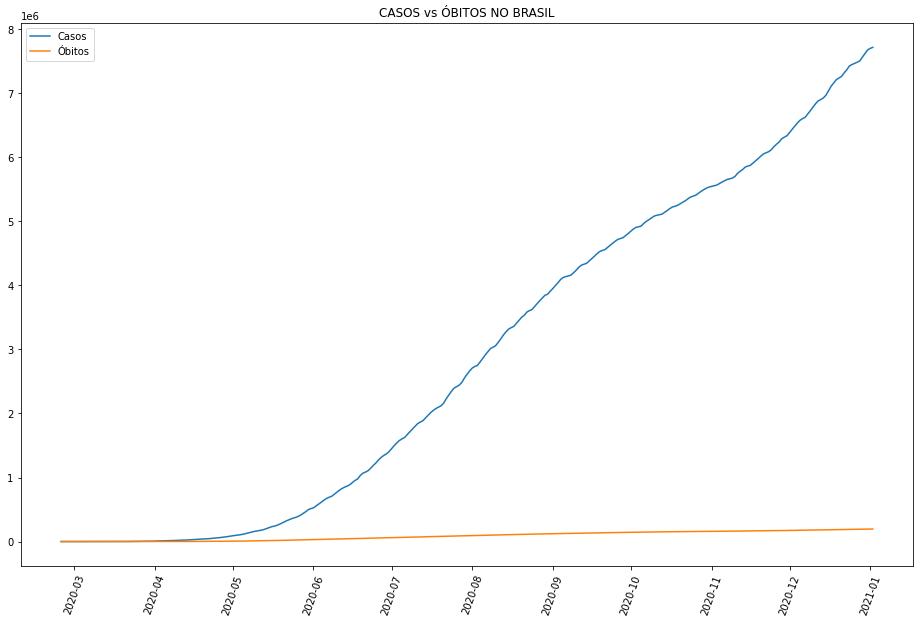

In [70]:
fig = plt.figure(figsize=(16, 10))
plt.xticks(rotation=70)

plt.plot('data', 'casosAcumulado', data=covid_brasil, label='Casos')
plt.plot('data', 'obitosAcumulado', data=covid_brasil, label='Óbitos')

plt.title('CASOS vs ÓBITOS NO BRASIL')
plt.legend()